In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


ABOUT THE FEATURES : age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital) chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (****Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect) target: Heart disease (0 = no, 1 = yes)

In [3]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

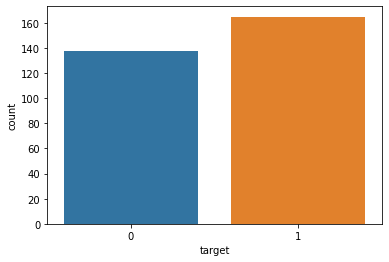

In [4]:
sns.countplot(df['target'])

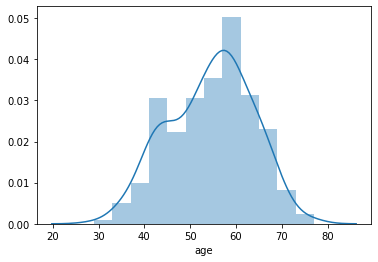

In [5]:
sns.distplot(df['age'])

In [6]:
df.groupby('target')['age'].mean()

target
0    56.601449
1    52.496970
Name: age, dtype: float64

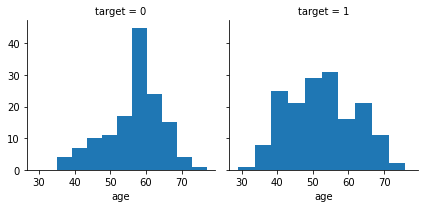

In [7]:
fg = sns.FacetGrid(col = 'target',data=df)
fg.map(plt.hist,'age')

In [8]:
df.groupby('target')['sex'].value_counts()

target  sex
0       1      114
        0       24
1       1       93
        0       72
Name: sex, dtype: int64

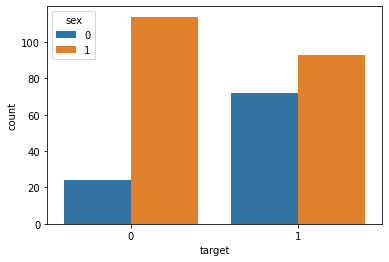

In [9]:
sns.countplot(df['target'],hue =df['sex'])

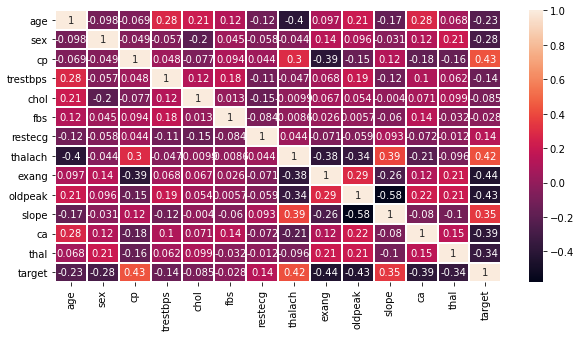

In [10]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot=True,linewidths=1)

Since Thalach and cp are the only features mildly correlated with the Target Variable

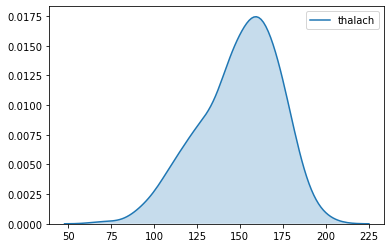

In [11]:
sns.kdeplot(df['thalach'],shade = True)

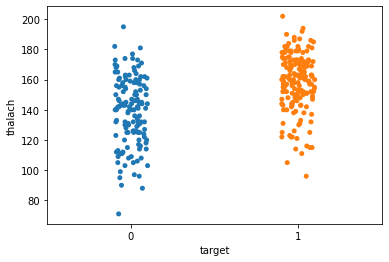

In [13]:
sns.stripplot(x=df['target'],y=df['thalach'])

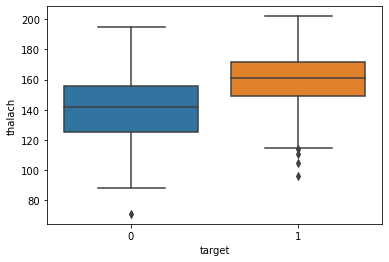

In [14]:
sns.boxplot(x=df['target'],y=df['thalach'])

In [15]:
df.groupby('target')['cp'].value_counts()

target  cp
0       0     104
        2      18
        1       9
        3       7
1       2      69
        1      41
        0      39
        3      16
Name: cp, dtype: int64

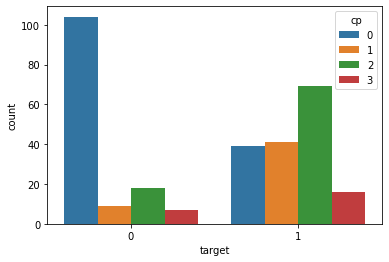

In [16]:
sns.countplot(df['target'],hue = df['cp'])

FEATURE ENGINEERING

In [17]:
df.shape

(303, 14)

In [18]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables

In [19]:
cp_new = pd.get_dummies(df['cp'], prefix = "cp")
thal_new = pd.get_dummies(df['thal'], prefix = "thal")
slope_new = pd.get_dummies(df['slope'], prefix = "slope")

In [20]:
frames = [df, cp_new, thal_new, slope_new]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [21]:
df = df.drop(['cp', 'thal', 'slope'],axis=1)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


**Creating Models**

In [22]:
X = df.drop(['target'],axis=1)
y = df['target']

In [24]:
# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'],axis=1)
y = df['target']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[23  6]
 [ 1 31]]


In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8852459016393442


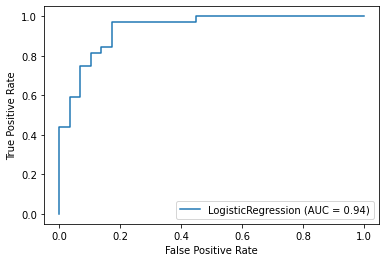

In [32]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,X_test,y_test)

K Nearest Neighbor

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [40]:
print(confusion_matrix(y_test,y_pred))

[[16 13]
 [11 21]]


In [41]:
print(accuracy_score(y_test,y_pred))

0.6065573770491803


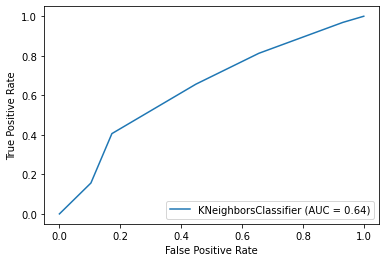

In [43]:
plot_roc_curve(knn,X_test,y_test)

Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [49]:
print(confusion_matrix(y_test,y_pred))

[[23  6]
 [ 3 29]]


In [50]:
print(accuracy_score(y_test,y_pred))

0.8524590163934426


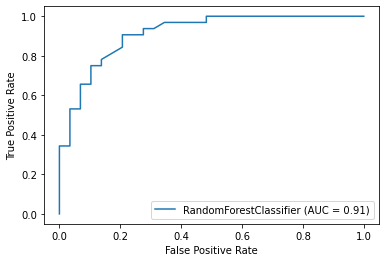

In [51]:
plot_roc_curve(rf,X_test,y_test)

Naive Bayes Classifier

In [54]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [56]:
print(confusion_matrix(y_test,y_pred))

[[23  6]
 [ 2 30]]


In [57]:
print(accuracy_score(y_test,y_pred))

0.8688524590163934


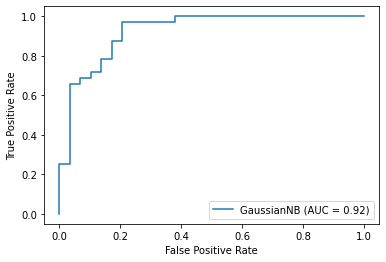

In [59]:
plot_roc_curve(nb,X_test,y_test)

# **SUMMARY**

*Logistic Regression Model has Highest Accuracy : 88% Highest AUC Score : 0.94 and Least False Negative Rate*

Therefore we will use Logistic Regression Model while classifying